In [1]:
# Model Measurement Analysis: Using any dataset and any classifier, calculate TP, TN, FP and
# FN from sklearn library functions. Also calculate different metrics (Accuracy, Precision,
# Recall(Sensitivity), F1-Score, MCC, Specificity, Negative Predictive Value) by defining our own
# functions. Compare your values with scikit-learn's library functions. Get the result of Confusion
# Matrix using sklearn. Using sklearn, plot the ROC & AUC Curves for your test data and random
# probabilities. Using sklearn, calculate the AUC of your test data and of random probabilities.
# Interpret the results. Write the inference/analysis of each output. Expectation is Supervised
# Learning Algorithms. Therefore, use any classifier.

In [2]:
# We will use titanic dataset and KNNClassifier
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
df.drop(['Name','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Fare
0,0,3,7.2500
1,1,1,71.2833
2,1,3,7.9250
3,1,1,53.1000
4,0,3,8.0500


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1) , df['Survived'] , test_size=0.3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn.predict(x_test)

<AxesSubplot: >

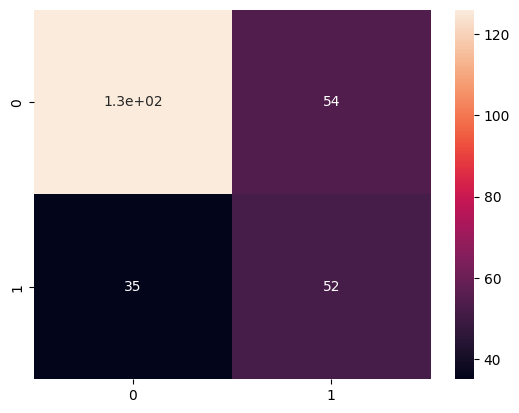

In [10]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_pred,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [11]:
tn,fp,fn,tp = confusion_matrix(y_pred,y_test).ravel()

In [13]:
acc = (tp+tn)/(tp+tn+fp+fn)
print(acc)
accL = accuracy_score(y_test,y_pred)
print(accL)

0.6666666666666666
0.6666666666666666


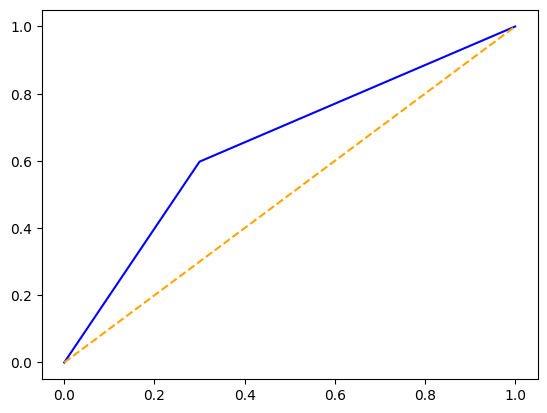

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve , roc_auc_score
fpr,tpr,_ = roc_curve(y_pred,y_test)
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.show()